In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
# 決定木 (深さ 1) スクラッチ
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    
    def _gini(self,X):
        """
        ジニ不純物の計算
        Parameters
        ----------
        X : 次の形の ndarray, shape (n_samples,)
            学習データのラベル値
        """
        unique,count = np.unique(X,return_counts=True)
        tmp = 0
        
        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2
        
        return 1-tmp
        
    def fit(self, X, y):
        """
        決定木分類器をトレーニングする
        Parameters
        ----------
        X : 次の形の ndarray、形状 (n_samples、n_features)
            訓練データの特徴
        y : 次の形の ndarray, shape (n_samples, )
            学習データの正解値
        """
        
        feature_num = X.shape[1]
        
        self.gain = 0
        for i in range(feature_num):
            self.threshold = np.unique(X[:,i])
            
            for j in self.threshold[1:]:
                l = y[X[:,i] < j]
                r = y[X[:,i] >=j]
                
                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)
                
                tmp = self._gini(y) -gini_l -gini_r
                
                if tmp > self.gain:
                    self.l_label = statistics.mode(l)
                    self.r_label = statistics.mode(r)
                    self.feature = i
                    self.threshold = j
                    self.gain = tmp
                    
                    # verboseがtrueの場合、学習過程を出力する
                    if self.verbose:
                        print('feature',self.feature,
                              'threshold',self.threshold,
                              'gain',self.gain)
            
    def predict(self, X):
        """
        決定木分類器を使用してラベルを推定する
        """
        
        return np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)

In [3]:
# 決定領域の視覚化
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [4]:
# 問題1:不純度を求める関数

# テストデータで確認

X = np.array([0,2,1,-1,4])
y = np.array([0,0,0,1,1])

In [5]:
threshold_value = np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [6]:
# ラベル値による分類
u,counts = np.unique(y,return_counts=True)
print('unique',u,'unique_counts',counts)

unique [0 1] unique_counts [3 2]


In [7]:
# ジニ不純物の計算
def _gini(X):
    unique,count = np.unique(X,return_counts=True)
    
    tmp = 0
    for i in unique:
        tmp += (count[unique==i]/np.sum(count))**2
    
    return 1-tmp

In [8]:
# 各しきい値におけるジニ不純物の計算
for i in threshold_value[1:]:
    c1 = y[X < i]
    c2 = y[X >=i]
    
    print(i,'c1',c1,'c2',c2)
    print(i,'gini_left:',_gini(c1),'gini_right:',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left: [0.] gini_right: [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left: [0.5] gini_right: [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left: [0.44444444] gini_right: [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left: [0.375] gini_right: [0.]


In [9]:
# 問題2:情報利得を求める関数

# 各しきい値で情報ゲインを計算する
for i in threshold_value[1:]:
    c1 = y[X < i]
    c2 = y[X >=i]
    
    left = len(c1)/(len(c1)+len(c2))*_gini(c1)
    right = len(c2)/(len(c1)+len(c2))*_gini(c2)
    
    gain = _gini(X) -left -right
    print(i,gain)

0 [0.5]
1 [0.33333333]
2 [0.33333333]
4 [0.5]


In [10]:
# 問題3:学習

# Sample data 2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

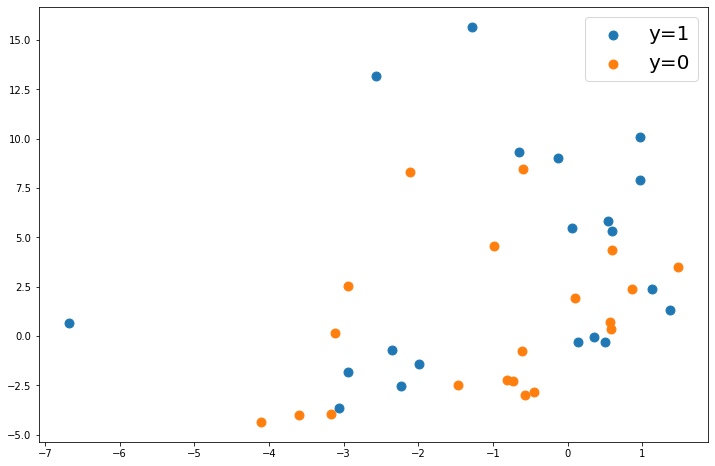

In [11]:
# 単純なデータの視覚化 2
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[y==1,0],X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0],X[y==0,1],s=80,label='y=0')
plt.legend();

In [12]:
# トレーニング データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [13]:
# スクラッチ決定木による学習プロセスの可視化
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train,y_train)

feature 0 threshold -4.1013 gain [0.01820817]
feature 0 threshold -0.65259 gain [0.01937624]
feature 0 threshold -0.57242 gain [0.03039982]
feature 0 threshold -0.44699 gain [0.04715402]
feature 0 threshold -0.12243 gain [0.068391]
feature 1 threshold -2.2135 gain [0.07877604]
feature 1 threshold -1.8219 gain [0.10010002]


In [14]:
# 問題4:推定

y_pred = clf1.predict(X_valid)

print(y_pred)
print(y_valid)

[1 1 1 0 1 1 1 1]
[1 0 0 1 1 1 1 0]


In [15]:
# 問題5:学習と推定

# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.5
precision 0.5714285714285714
recall 0.8
f1 0.6666666666666666


In [16]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_valid)

In [17]:
print(y_pred)
print(y_valid)

[1 1 1 0 1 1 1 1]
[1 0 0 1 1 1 1 0]


In [18]:
# 評価指標
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.5
precision 0.5714285714285714
recall 0.8
f1 0.6666666666666666


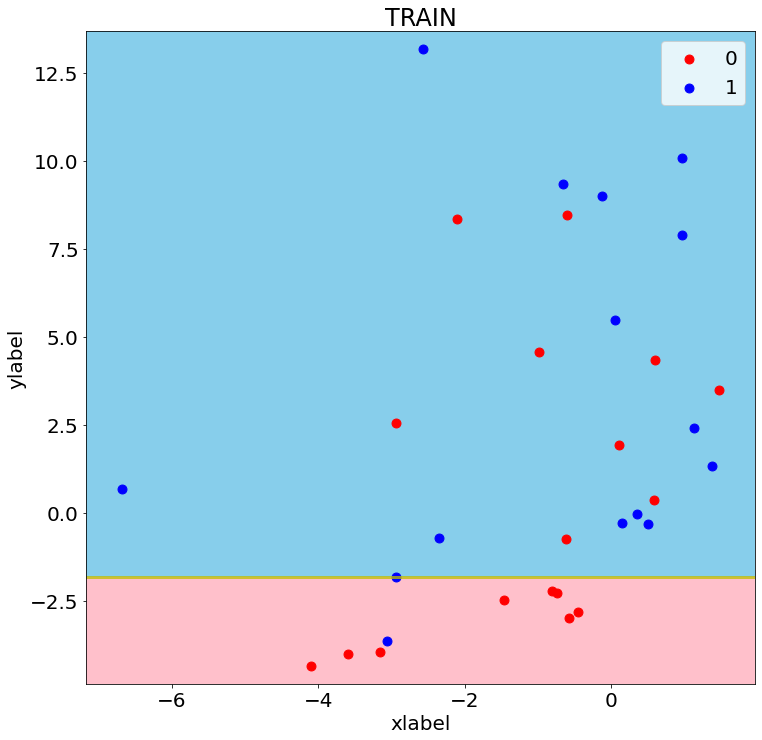

In [19]:
# 問題6

# スクラッチ決定木分類の結果
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf1,target_names=['0', '1'],title='TRAIN')

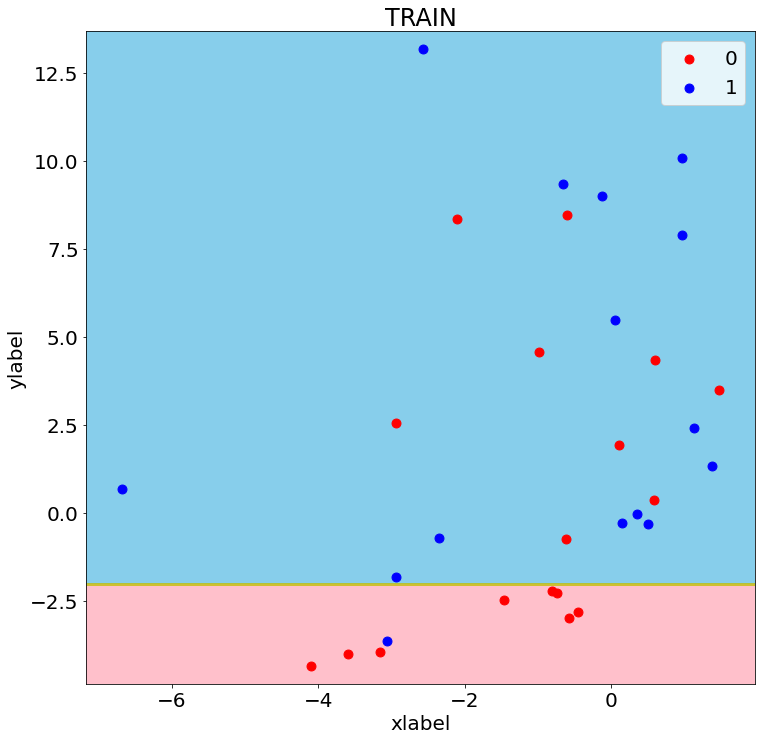

In [20]:
# scikit-learn の決定木分類結果
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf2,target_names=['0', '1'],title='TRAIN')

In [21]:
# 問題7:(アドバンス課題)深さ2の決定木分類器クラスの作成

# トレーニングおよび検証データの再生成
X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [22]:
# ノードクラス
class Node():
    """
    決定木のノードを構成および分離するクラス
    Parameters
    ----------
    verbose : bool
      学習過程を出力したい場合はTrue
    max_depth : int
      決定木の最大学習深度
    """
    def __init__(self, max_depth=None, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        self.feature = None
        
    def _separate(self,X,y,depth):
        """
        CART メソッドを使用してノードを分割
        Parameters
        ----------
        X : 次の形の ndarray、形状 (n_samples、n_features)
            訓練データの特徴
        y : 次の形の ndarray, shape (n_samples,)
            学習データのラベル値
        depth : int
            このノードの深さ
        """
        self.depth = depth
        features = X.shape[1]
        
        # 分岐後、ジニ純度が0の場合、分岐終了
        if len(np.unique(y))==1:
            self.label = np.unique(y)[0]
            return
        
        # 最大深度に達すると分岐が終了
        if self.depth == self.max_depth:
            self.label = statistics.mode(y)
            return
        
        self.gain = 0
        for feature_number in range(features):

            thresholds = np.unique(X[:,feature_number])
            
            for threshold_value in thresholds[1:]:
                l = y[X[:,feature_number] < threshold_value]
                r = y[X[:,feature_number] >=threshold_value]
                
                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)
                
                gain_tmp = self._gini(y) -gini_l -gini_r
                
                if gain_tmp > self.gain:
                    self.feature = feature_number
                    self.threshold = threshold_value
                    self.gain = gain_tmp
                    
        # verboseがtrueの場合、学習過程を出力
        if self.verbose:
            print('depth',self.depth,
                  'feature',self.feature,
                  'threshold',self.threshold,
                  'gain',self.gain)
        
        # 子ノードの分岐 (左)
        l_X = X[X[:,self.feature] < self.threshold]
        l_y = y[X[:,self.feature] < self.threshold]
        self.left = Node(self.max_depth,self.verbose)
        self.left._separate(l_X,l_y,depth+1)
        
        # 子ノードの分岐 (右)
        r_X = X[X[:,self.feature] >=self.threshold]
        r_y = y[X[:,self.feature] >=self.threshold]
        self.right = Node(self.max_depth,self.verbose)
        self.right._separate(r_X,r_y,depth+1)
    
    def _gini(self,X):
        """
        ジニ不純物の計算
        Parameters
        ----------
        X : 次の形の ndarray, shape (n_samples,)
            学習データのラベル値
        """
        unique,count = np.unique(X,return_counts=True)
        
        impure = 0
        for i in unique:
            impure += (count[unique==i]/np.sum(count))**2
        
        return 1-impure
    
    def _predict(self,X):
        """
        学習した決定木分類器を使用して、ラベルを推定する
        """
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        
        else:
            if X[self.feature] < self.threshold:
                return self.left._predict(X)
            else:
                return self.right._predict(X)

In [23]:
# スクラッチ決定木
class ScratchDecesionTreeClassifier():
    """
    深さ n の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力したい場合はTrue
    max_depth : int
      決定木の最大学習深度
    """
    
    def __init__(self, max_depth=1,verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        
    def fit(self, X, y):
        """
        決定木分類器をトレーニングする
        Parameters
        ----------
        X : 次の形の ndarray、形状 (n_samples、n_features)
            訓練データの特徴
        y : 次の形の ndarray, shape (n_samples, )
            学習データの正解値
        """
        self.depth=0
        self.root = Node(self.max_depth,self.verbose)
        self.root._separate(X,y,self.depth)
        
    def predict(self, X):
        """
        決定木分類器を使用してラベルを推定する
        """
        y_pred = np.zeros(len(X))
        
        for i,x in enumerate(X):
            y_pred[i] = self.root._predict(x)
        return y_pred

In [24]:
# スクラッチ決定木による深さ2の学習
clf3 = ScratchDecesionTreeClassifier(max_depth=2,verbose=False)
clf3.fit(X_train,y_train)

In [25]:
y_pred3 = clf3.predict(X_valid)
print(y_pred3)

[0. 0. 0. 0. 0. 0. 0. 0.]


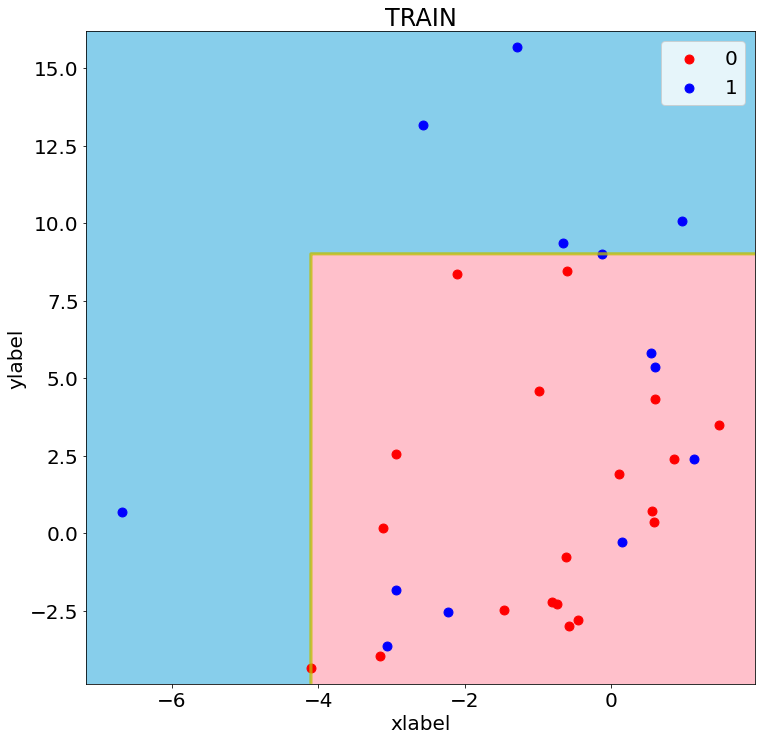

In [26]:
# Scratch決定木の決定領域 (深さ 2)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf3,target_names=['0', '1'],title='TRAIN')

In [27]:
# 問題8:(アドバンス課題)深さに制限のない決定木分類器クラスの作成

# スクラッチ決定木の学習 (深さ n)
clf5 = ScratchDecesionTreeClassifier(max_depth=None,verbose=False)
clf5.fit(X_train,y_train)

In [28]:
y_pred5 = clf5.predict(X_valid)
print(y_pred5)

[1. 0. 1. 1. 0. 1. 1. 0.]


In [29]:
accuracy = accuracy_score(y_valid, y_pred5)
precision = precision_score(y_valid, y_pred5)
recall = recall_score(y_valid, y_pred5)
f1 = f1_score(y_valid, y_pred5)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.75
precision 1.0
recall 0.7142857142857143
f1 0.8333333333333333


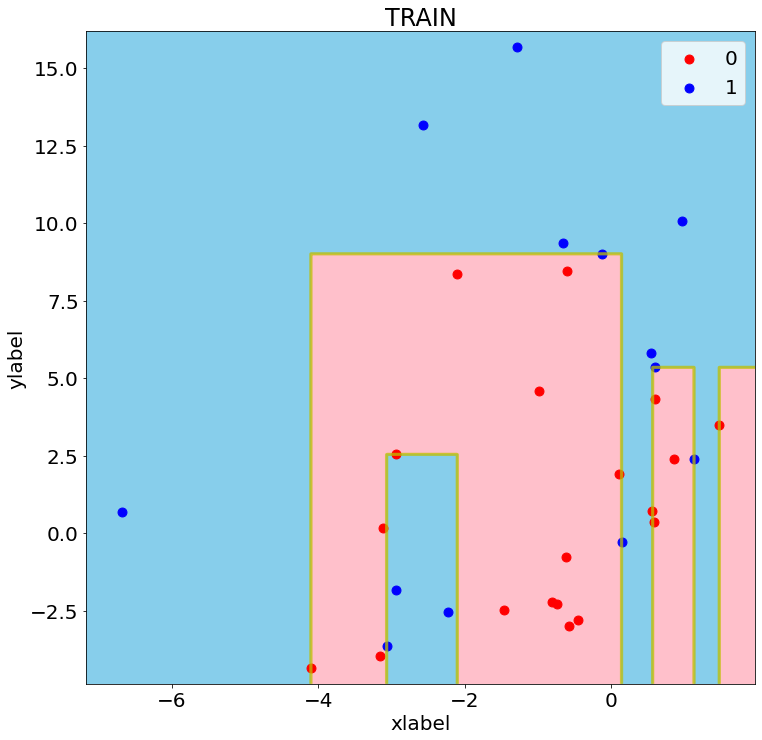

In [30]:
# スクラッチ決定木の決定領域 (深さ n)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf5,target_names=['0', '1'],title='TRAIN')

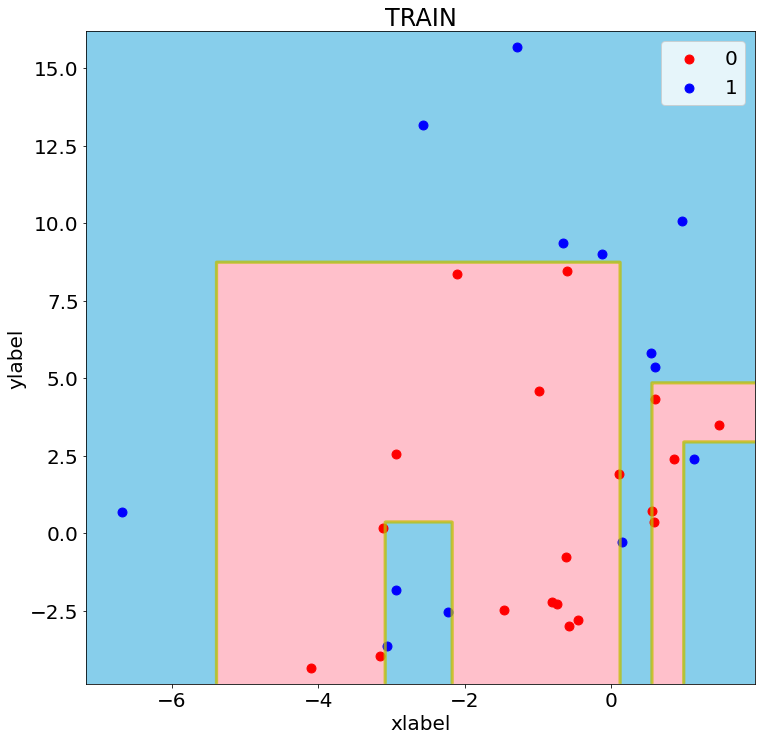

In [31]:
# Sklearn決定木の決定領域 (深さ n)
clf_sk = DecisionTreeClassifier(max_depth=None,random_state=None)
clf_sk.fit(X_train,y_train)


fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf_sk,target_names=['0', '1'],title='TRAIN')

In [32]:
# ノードを深さ n まで生成するクラス
class Test():
    def __init__(self,max_depth,lr=None):
        self.max_depth = max_depth
        self.lr = lr
        
    def separate(self,depth):
        self.depth = depth
        
        print('Depth',self.depth,'Node',self.lr)
        
        if self.depth < self.max_depth:
            
            self.lr += ' left'
            self.left = Test(self.max_depth,self.lr)
            self.left.separate(depth+1)
            
            self.lr += ' right'
            self.right = Test(self.max_depth,self.lr)
            self.right.separate(depth+1)
    
    def trace(self):
        
        if self.depth == self.max_depth:
            return print('Depth',self.depth,'Reach max_depth')
        
        else:
            print('Depth',self.depth,'Next Left Node')
            self.left.trace()
            print('Depth',self.depth,'Next Right Node')
            self.right.trace()

In [33]:
# ノードを分割する
test = Test(max_depth=4,lr='Root')
test.separate(depth=0)

Depth 0 Node Root
Depth 1 Node Root left
Depth 2 Node Root left left
Depth 3 Node Root left left left
Depth 4 Node Root left left left left
Depth 4 Node Root left left left left right
Depth 3 Node Root left left left right
Depth 4 Node Root left left left right left
Depth 4 Node Root left left left right left right
Depth 2 Node Root left left right
Depth 3 Node Root left left right left
Depth 4 Node Root left left right left left
Depth 4 Node Root left left right left left right
Depth 3 Node Root left left right left right
Depth 4 Node Root left left right left right left
Depth 4 Node Root left left right left right left right
Depth 1 Node Root left right
Depth 2 Node Root left right left
Depth 3 Node Root left right left left
Depth 4 Node Root left right left left left
Depth 4 Node Root left right left left left right
Depth 3 Node Root left right left left right
Depth 4 Node Root left right left left right left
Depth 4 Node Root left right left left right left right
Depth 2 Node Root 

In [34]:
# 生成されたノードのトレース
test.trace()

Depth 0 Next Left Node
Depth 1 Next Left Node
Depth 2 Next Left Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 2 Next Right Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 1 Next Right Node
Depth 2 Next Left Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 2 Next Right Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 0 Next Right Node
Depth 1 Next Left Node
Depth 2 Next Left Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 2 Next Right Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 1 Next Right Node
Depth 2 Next Left Node
Depth 3 Next Left Node
Depth 4 Reach max_depth
Depth 3 Next Right Node
Depth 4 Reach max_depth
Depth 2 Next Right Node
Depth 

In [35]:
class Test2():
    def __init__(self,i_var='Hello'):
        self.i_var = i_var
        
    def __str__(self):
        return self.i_var

In [36]:
print(Test2('Rooo'))

Rooo
